In [1]:
import xgboost as xgb
import seaborn as sns
sns.set_style("white")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=80)
%matplotlib inline
import ROOT
from root_numpy import root2array, tree2array, fill_hist

Welcome to JupyROOT 6.07/07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd94b324d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd94b0da750>]], dtype=object)

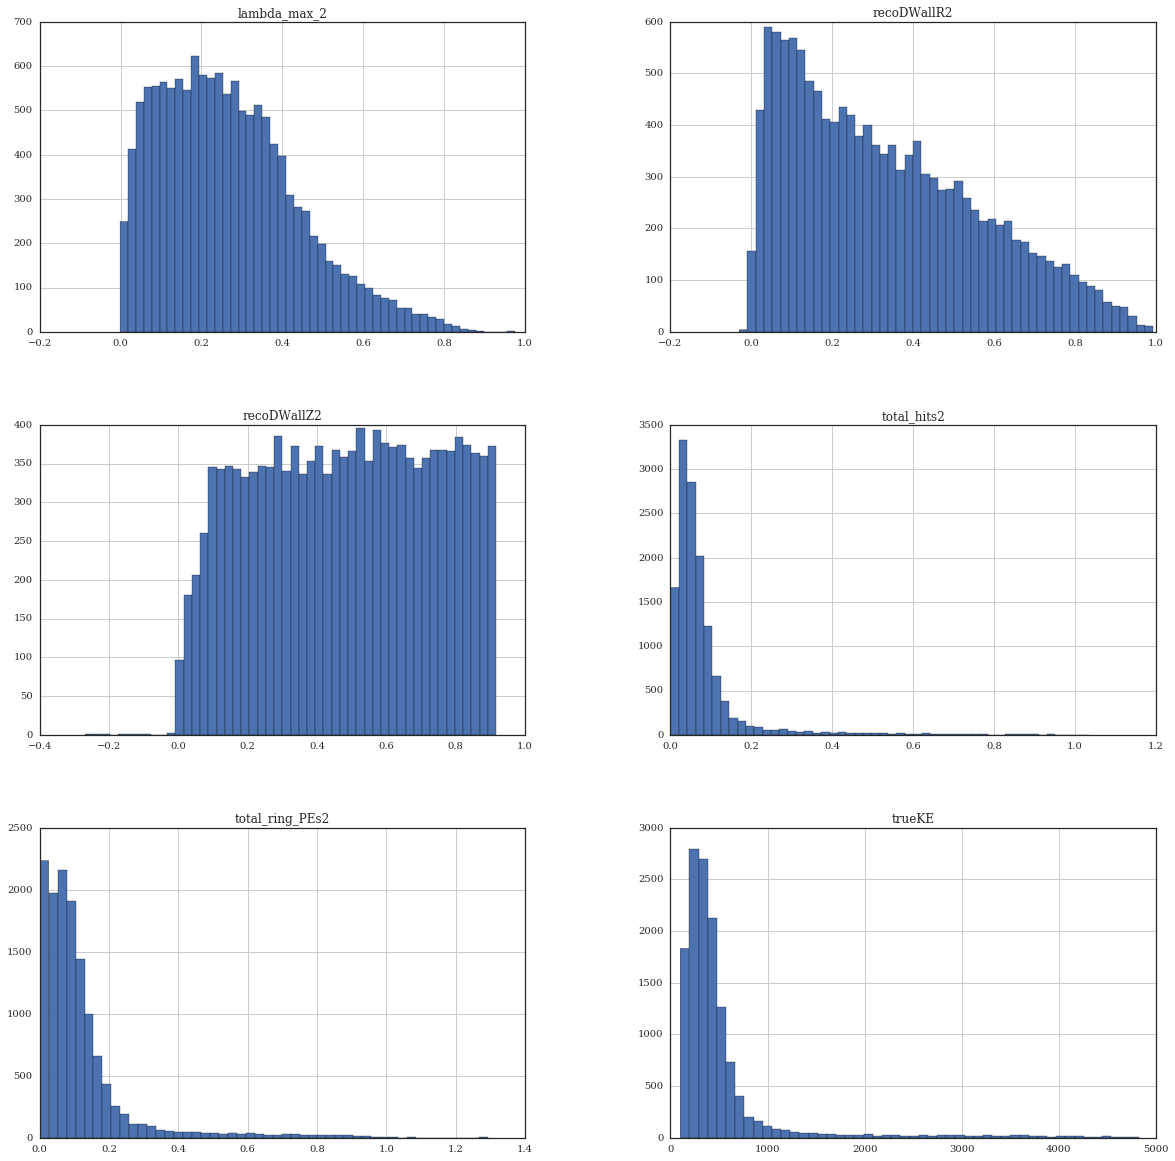

In [13]:
columns = ['total_hits2', 'total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2','trueKE']
E_threshold = 100
data    = root2array('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_1000_1039_CCQE_12in_energy_studies_recoquant_tree.root', branches=columns, treename='nu_eneNEW')
data_lo = root2array('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_1000_1039_CCQE_12in_energy_studies_recoquant_tree.root', branches=columns, treename='nu_eneNEW',selection='trueKE<'+str(E_threshold))
data_hi = root2array('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_1000_1039_CCQE_12in_energy_studies_recoquant_tree.root', branches=columns, treename='nu_eneNEW',selection='trueKE>'+str(E_threshold))
#data = root2array('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_nue_1000_1039_CCQE_12in_energy_studies_recoquant_tree_NEWlookups.root', branches=columns, treename='nu_eneNEW')
import pandas as pd
data_frame = pd.DataFrame(data_hi)
data_frame.hist(bins=50, figsize=(20,20))

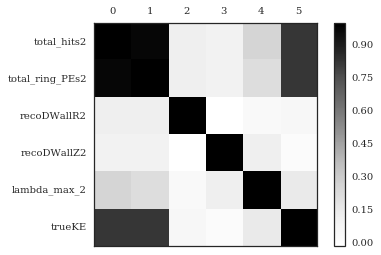

In [14]:
corr = data_frame.corr()
fig, ax = plt.subplots()
cax = ax.matshow(corr)
#plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.colorbar(cax)

In [15]:
corr

,total_hits2,total_ring_PEs2,recoDWallR2,recoDWallZ2,lambda_max_2,trueKE
total_hits2,1.000000,0.974064,0.115996,0.095848,0.258392,0.825996
total_ring_PEs2,0.974064,1.000000,0.117676,0.096087,0.219972,0.823612
recoDWallR2,0.115996,0.117676,1.000000,-0.010983,0.036092,0.048689
recoDWallZ2,0.095848,0.096087,-0.010983,1.000000,0.115609,0.018511
lambda_max_2,0.258392,0.219972,0.036092,0.115609,1.000000,0.148691
trueKE,0.825996,0.823612,0.048689,0.018511,0.148691,1.000000


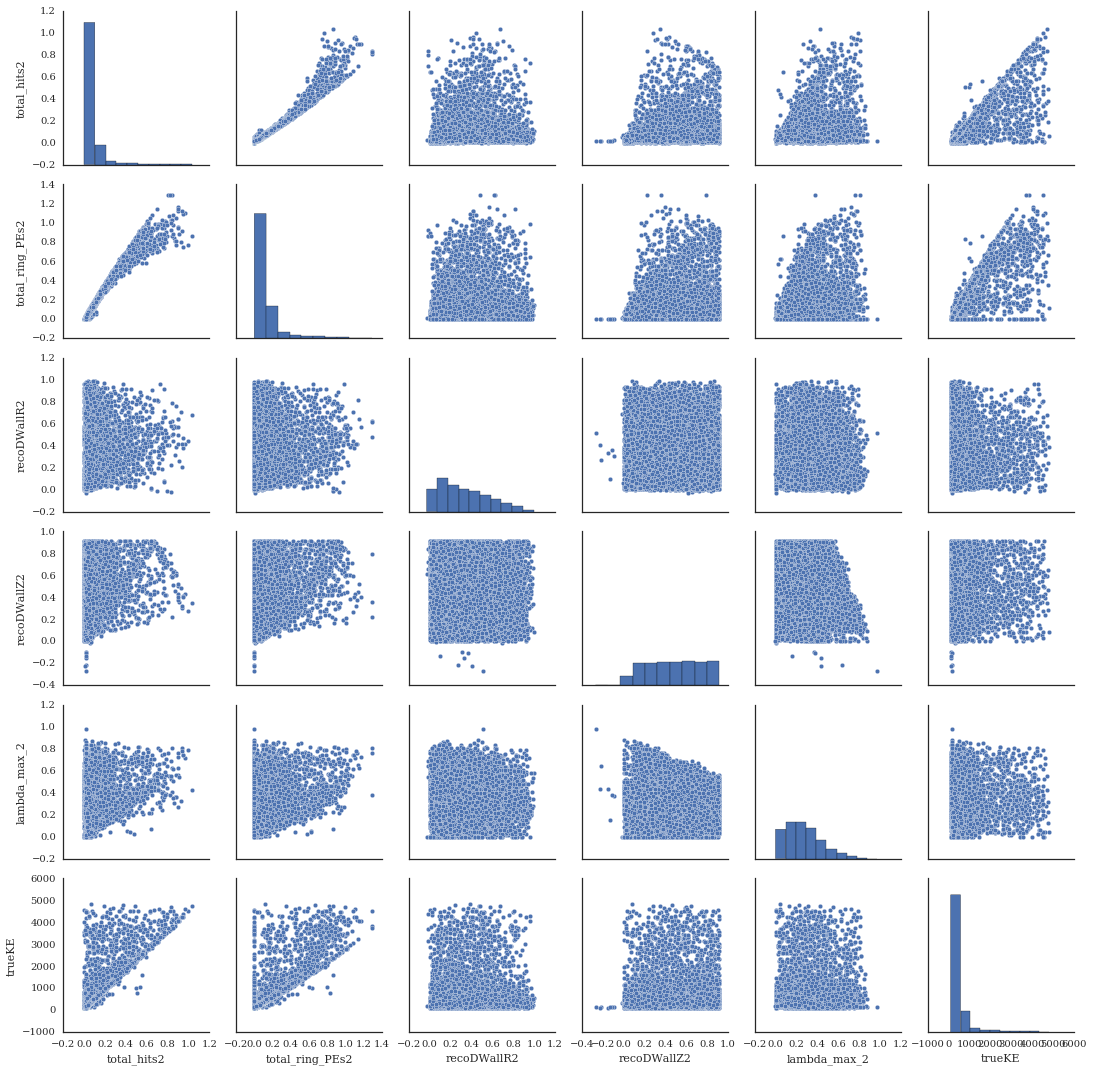

In [16]:
g = sns.pairplot(data_frame)

In [ ]:
print len(data_lo)
print len(data_hi)

In [ ]:
data_input_lo = data_lo[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2']]
data_truth_lo = data_lo[['trueKE']]
data_input_n_lo = data_input_lo.view(data_input_lo.dtype[0]).reshape(data_input_lo.shape + (-1,))
data_truth_n_lo = data_truth_lo.view(data_truth_lo.dtype[0]).reshape(data_truth_lo.shape + (-1,))/1e3
data_input_hi = data_hi[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2']]
data_truth_hi = data_hi[['trueKE']]
data_input_n_hi = data_input_hi.view(data_input_hi.dtype[0]).reshape(data_input_hi.shape + (-1,))
data_truth_n_hi = data_truth_hi.view(data_truth_hi.dtype[0]).reshape(data_truth_hi.shape + (-1,))/1e3
print type(data_input_n_lo), data_input_n_lo.shape
print data_input_n_lo[:2]
print data_truth_n_lo[:2]
print type(data_input_n_hi), data_input_n_hi.shape
print data_input_n_hi[:2]
print data_truth_n_hi[:2]

In [ ]:
print data_truth_n_lo.shape
print data_truth_n_hi.shape

In [ ]:
model_lo = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, subsample=0.5, n_estimators=800)
history_lo = model_lo.fit(data_input_n_lo, data_truth_n_lo)
model_hi = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, subsample=0.5, n_estimators=800)
history_hi = model_hi.fit(data_input_n_hi, data_truth_n_hi)
model_lo
model_hi

In [ ]:
model_lo.get_params

In [ ]:
predicted_energy_lo = model_lo.predict(data_input_n_lo)
predicted_energy_hi = model_hi.predict(data_input_n_hi)
print predicted_energy_lo[:2]
print predicted_energy_hi[:2]

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(data_truth_n_lo,predicted_energy_lo)
ax1.set_xlabel("trueKE [GeV]")
ax1.set_ylabel("recoKE [GeV]")
ax2.scatter(data_truth_n_hi,predicted_energy_hi)
ax2.set_xlabel("trueKE [GeV]")
ax2.set_ylabel("recoKE [GeV]")

In [ ]:
chain = ROOT.TChain('nu_eneNEW')
for i in range(1040,1099):
    chain.Add('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_'+str(i)+'_CCQE_12in_energy_studies_recoquant_tree_NEWlookupsB.root')
test_data = tree2array(chain, branches=columns)

In [ ]:
len(test_data)

In [ ]:
test_data_input = test_data[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2']]
test_data_truth = test_data[['trueKE']]
test_data_input_n = test_data_input.view(test_data_input.dtype[0]).reshape(test_data_input.shape + (-1,))
#test_data_truth_n = test_data_truth.view(test_data_truth.dtype[0]).reshape(test_data_truth.shape + (-1,))/1e3
test_data_truth_n = test_data_truth.view(test_data_truth.dtype[0])/1e3

In [ ]:
test_predicted_energy_lo = model_lo.predict(test_data_input_n)
test_predicted_energy_hi = model_hi.predict(test_data_input_n)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(test_data_truth_n,test_predicted_energy_lo)
ax1.set_xlabel("trueKE [GeV]")
ax1.set_ylabel("recoKE [GeV]")
ax1.set_ylim((0,0.1))
ax1.set_xlim((0,0.1))
ax2.scatter(test_data_truth_n,test_predicted_energy_hi)
ax2.set_xlabel("trueKE [GeV]")
ax2.set_ylabel("recoKE [GeV]")
ax2.set_ylim((0.1,2))
ax2.set_xlim((0.1,2))

In [ ]:
res_twod_lo = np.dstack((test_data_truth_n, np.abs(test_predicted_energy_lo-test_data_truth_n)/test_data_truth_n))
res_twod_hi = np.dstack((test_data_truth_n, np.abs(test_predicted_energy_hi-test_data_truth_n)/test_data_truth_n))
res_twod_lo[0]

In [ ]:
hist_lo = ROOT.TH2D('name_lo', 'title', 50 , 0, 0.1, 100, -0.1, 10)
hist_hi = ROOT.TH2D('name_hi', 'title', 50, 0.1, 5, 100, -0.1, 10)
fill_hist(hist_lo, res_twod_lo[0])
fill_hist(hist_hi, res_twod_hi[0])
c = ROOT.TCanvas()
c.Divide(2,1)
c.cd(1)
hist_lo.Draw()
c.cd(2)
hist_hi.Draw()
c.Draw()

In [ ]:
profile_lo = hist_lo.ProfileX()
profile_lo.BuildOptions(0,0,"s")
profile_lo.SetLineColor(ROOT.kBlue)
profile_lo.SetLineWidth(1)
profile_hi = hist_hi.ProfileX()
profile_hi.BuildOptions(0,0,"s")
profile_hi.SetLineColor(ROOT.kBlue)
profile_hi.SetLineWidth(1)
c1 = ROOT.TCanvas()
c1.Divide(2,1)
c1.cd(1)
c1.SetLogy(0)
profile_lo.SetMinimum(0)
profile_lo.SetMaximum(1)
profile_lo.GetXaxis().SetTitle('true KE [MeV]')
profile_lo.GetYaxis().SetTitle('abs(#DeltaE)/E')
profile_lo.Draw()
c1.cd(2)
c1.SetLogy(0)
profile_hi.SetMinimum(0)
profile_hi.SetMaximum(1)
profile_hi.GetXaxis().SetTitle('true KE [MeV]')
profile_hi.GetYaxis().SetTitle('abs(#DeltaE)/E')
profile_hi.Draw()
c1.Draw()

In [ ]:
xgb.plot_importance(model_lo)

In [ ]:
xgb.plot_importance(model_hi)